# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять **рыночную стоимость объектов недвижимости**. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### **План работ**

**Шаг 1.** **Изучим файл с данными**
1. Загрузим данные из файла в датафрейм.
2. Изучим общую информацию о полученном датафрейме.
3. Построим общую гистограмму для всех числовых столбцов таблицы.

**Шаг 2. Предобработка данных**

1. Найдём и изучим пропущенные значения в столбцах
2. Рассмотрим типы данных в каждом столбце
3. Изучим уникальные значения и дубликаты
4. Найдём и устраним редкие и выбивающиеся значения

**Шаг 3. Проведём исследовательский анализ данных:**

1. Изучим параметры объектов
2. Посмотрим, какие факторы больше всего влияют на целевые задачи исследования

**Шаг 5. Сделаем выводы и дадим рекомендации**

## Знакомство с данными

1. В результате первой попытки прочитать файл и вывести датафрейм оказалось, что в качестве разделителя колонок используется табуляция. Прочитаем файл `real_estate_data.csv` из папки `/datasets/`, указав в качестве разделителя знак табуляции `\t`, и сохраним результат в датафрейме `data`.

2. Вывод по умолчанию отображает не все колонки (их слишком много), поэтому добавим опцию отображения всех колонок

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# добавим опцию отображения всех колонок 
pd.set_option('display.max_columns', None)

try:
    # в качестве разделителя колонок используется табуляция
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    # в качестве разделителя колонок используется табуляция
    data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

In [2]:
# выведем данные для ознакомления
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Все колонки описаны, их назначение понятно

#### что видно из беглого взгляда на датасет
- хочется поправить camelCase для названия столбца `cityCenters_nearest`
- видно пропуски в данных. Вероятно, некоторые поля не обязательны для заполнения или не релевантны - нужно будет решить, что делать с пропусками
- некоторые вещественные колонки могли бы быть целочисленными (напр. количество балконов)
- нужно проверить уникальные значения в столбцах с названиями - там могут быть неявные дубликаты

In [3]:
# переименуем cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

# посмотрим основные данные по датасету
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### с чем придётся поработать

- `airports_nearest` — есть пропуски
- `balcony` — есть пропуски, возможно стоит поменять тип данных на `int`
- `ceiling_height` — есть пропуски
- `city_centers_nearest` — есть пропуски
- `days_exposition` — есть пропуски, возможно стоит поменять тип данных на `int`
- `first_day_exposition` — дата публикации имеет строковый формат - надо поменять на `datetime`
- `floors_total` — есть несколько пропусков, можно поменять тип данных на `int`
- `is_apartment` — в описании указано, что это `bool`, но тут это строка и очень много пропусков, надо присмотреться
- `kitchen_area` — есть пропуски
- `living_area` — есть пропуски
- `locality_name` — есть пропуски
- `parks_around3000` — есть пропуски, возможно стоит поменять тип данных на `int`
- `parks_nearest` — есть пропуски
- `ponds_around3000` — есть пропуски, возможно стоит поменять тип данных на `int`
- `ponds_nearest` — есть пропуски

In [4]:
# посмотрим общее описание датасета
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- `total_area` — общая площадь квартиры в квадратных метрах (м²) - тут максимальное значение сильно выбивается (900 м²) - надо посмотреть на выбросы
- `rooms` - тоже максимальное значение сильно выделяется, хотя, возможно, это та самая 900 м² квартира с 19 комнатами
- `ceiling_height` — высота потолков (м) - максимальное значение сильно выбивается (100 м). Минимальное тоже очень странное - 1м - надо посмотреть на выбросы


In [5]:
# посмотрим на количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков достаточно много. Обработаем их в отдельном разделе

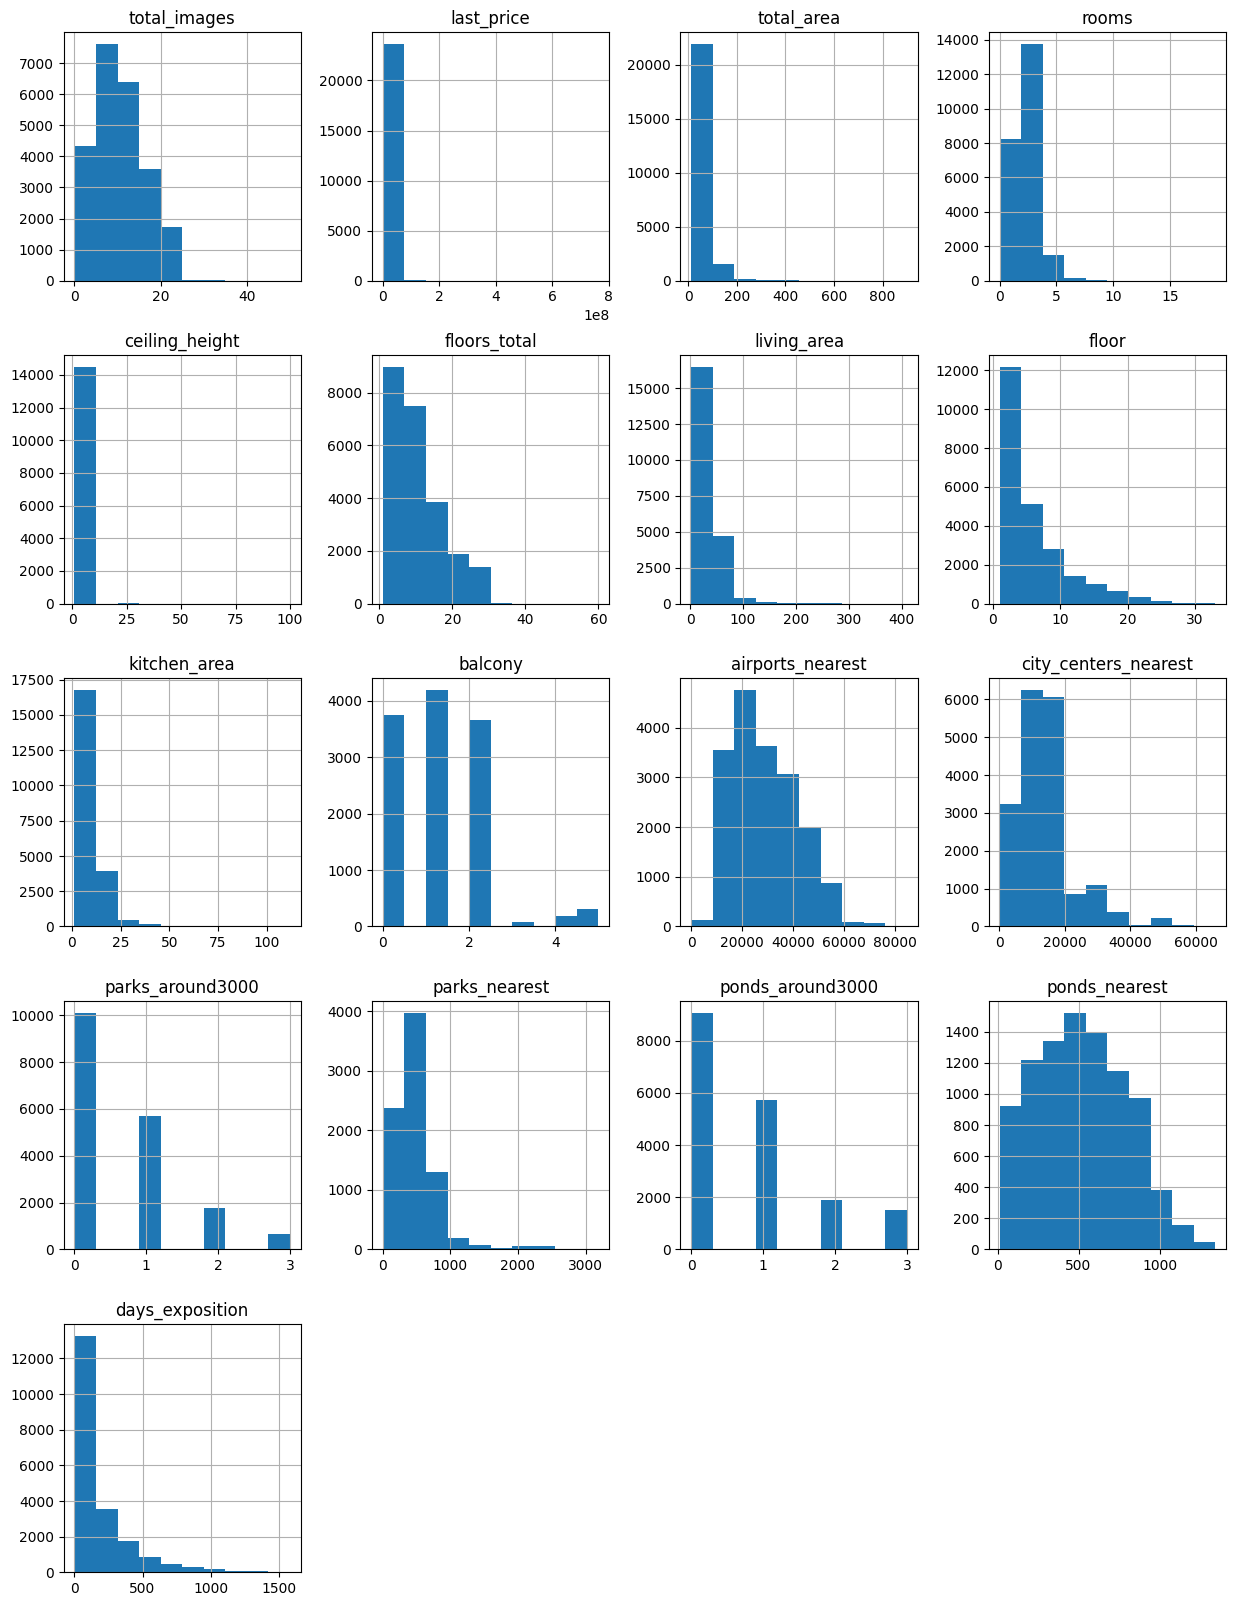

In [6]:
# Построим гистограммы для всего датасета, проверим распределения значений
data.hist(figsize=(15, 20))
plt.show()

На многих графиках видно наличие маленького количества высоких значений (выбросы) - их обработаем отдельно.

In [7]:
# проверим, есть ли полные дубликаты 
data.duplicated().sum()

0

### Промежуточные итоги:
В исходном датасете 23699 строк, описанных 22мя столбцами параметров. В описании данных достаточно.
- Мы обнаружили достаточно большое количество пропусков в некоторых параметрах. Они могут быть связаны с нестрогостью заполнения или ошибками импорта. Попробуем их обработать.
- В данных наблюдаются редкие значения, которые смещают выборки и могут быть ошибочными, так как выходят за рамки ожидаемых распределений. Эти значения нужно будет исправлять или удалять, чтобы не искажать модель
- Есть некоторые ошибки в типах данных, которые стоило бы исправить при формировании выгрузки. Для целей исследования будем их заменять

## Предобработка данных

### Пропущенные значения

Мы увидели пропущенные значения во многих столбцах:

- Попробуем заполнить пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 
- Если логичную замену предложить невозможно, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.

**Пропуски могли появиться:**
- Пользователь не захотел их указывать или не знал информацию
- Пустое значение заменяет False
- Пустое значение заменяет неприменимые / нерелевантные данные (как расстояние до ближайшего парка, если парков рядом нет)

In [8]:
# Снова определим столбцы для работы с пропусками
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- `ceiling_height`           9195
- `floors_total`               86
- `living_area`              1903
- `kitchen_area`             2278
- `balcony`                 11519
- `locality_name`              49
- `airports_nearest`         5542
- `city_centers_nearest`      5519
- `parks_around3000`         5518
- `parks_nearest`           15620
- `ponds_around3000`         5518
- `ponds_nearest`           14589
- `days_exposition`          3181

#### Высота потолков

In [9]:
# посмотрим, что из себя представляют строки с пропусками
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Кажется, высота потолков могла быть просто не указана. Посмотрим на распределение.

In [10]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что данные искажены аномальными значениями, однако диапазон, в который действительно могли попадать пропущенные значения, найти можно.

Видится два варианта - заменить пустые значения на медиану, или оставить пустыми, если медианные значения исказят модель.
Для целей исследования важно сохранить влияние параметров на цену и на количество дней до продажи. Проверим эти зависимости.

In [11]:
# корреляция высоты потолков со стоимостью квартиры
data['ceiling_height'].corr(data['last_price'])

0.08543030982842603

In [12]:
# корреляция высоты потолков со временем до продажи
data['ceiling_height'].corr(data['days_exposition'])

0.01909091947389998

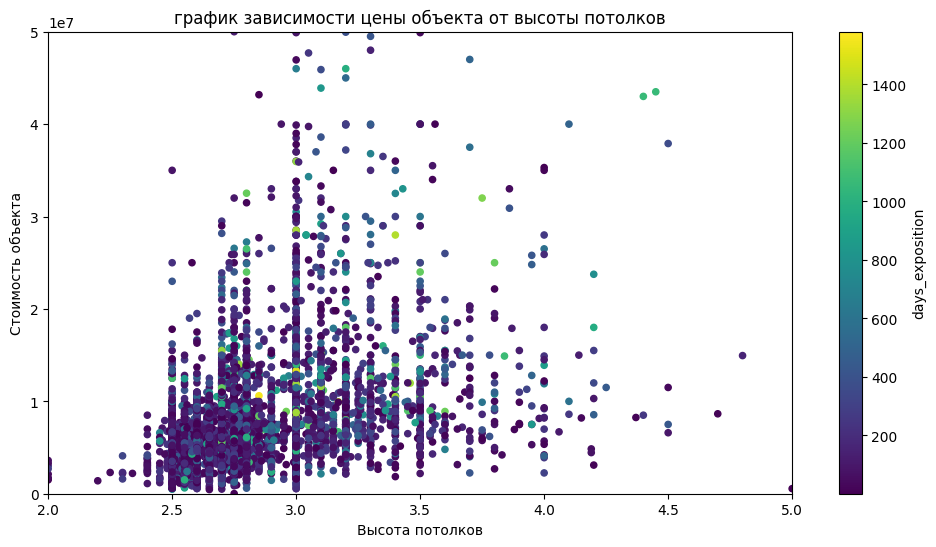

In [13]:
# график зависимости цены объекта от высоты потолков
ax = data.plot(kind='scatter', 
               x='ceiling_height', 
               y='last_price', 
               c='days_exposition', 
               colormap='viridis', 
               title='график зависимости цены объекта от высоты потолков', 
               figsize=(12,6))
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Стоимость объекта')
plt.ylim(0, 50000000)
plt.xlim(2,5)
plt.show()

Кажется, что высота потолков слабо кореллирует с основными параметрами. Попробуем заменить пропуски на медианные значения и сравним с исходными. 

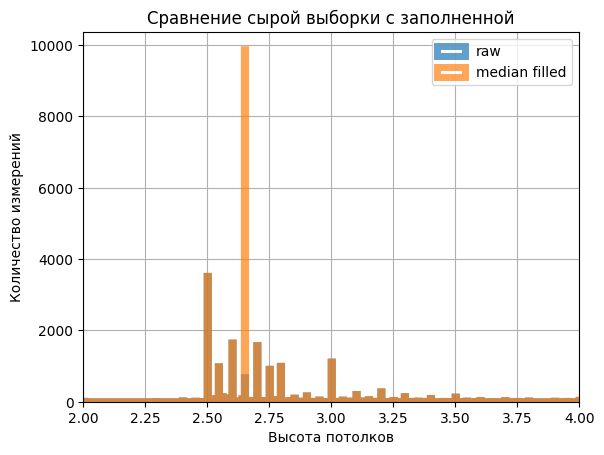

In [14]:
# создадим новую переменную для очищенных данных
test_data = data.copy()

# заполним пропуски медианными значениями
test_data['ceiling_height'] = test_data['ceiling_height'].fillna(test_data['ceiling_height'].median())

ax = data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 5),
    bins=1000,
    linewidth=5,
    alpha=0.7,
    label='raw',
    title='Сравнение сырой выборки с заполненной'
)
test_data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 5),
    bins=1000,
    linewidth=5,
    alpha=0.7,
    label='median filled',
    ax=ax,
    grid=True,
    legend=True,
)
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество измерений')
plt.xlim(2,4)
plt.show()

In [15]:
# проверим влияние наших действий на корелляцию
test_data['ceiling_height'].corr(test_data['last_price'])

0.06442462574188172

Корелляция даже незначительно уменьшилась. Примем вариант с усреднением.

In [16]:
# создадим новую переменную для очищенных данных
clean_data = data.copy()

clean_data['ceiling_height'] = clean_data['ceiling_height'].fillna(clean_data['ceiling_height'].median())

#### Общее количество этажей

In [17]:
# посмотрим, что из себя представляют строки с пропусками
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [18]:
# количество строк с пустыми значениями
data['floors_total'].isna().sum()

86

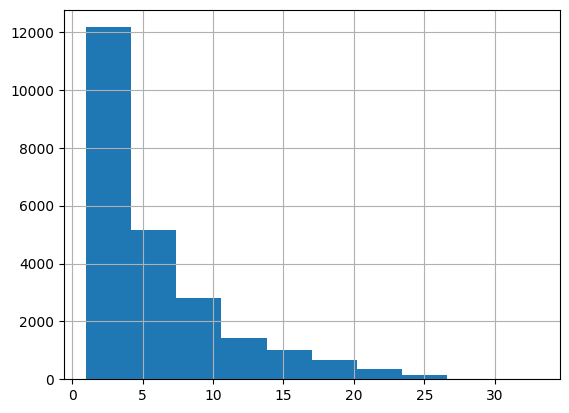

In [19]:
# гистограмма непустых значений
data['floor'].hist()
plt.show()

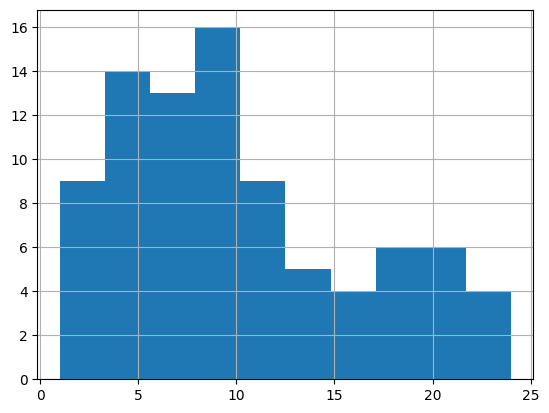

In [20]:
# гистограмма пустых значений
data[data['floors_total'].isna()]['floor'].hist()
plt.show()

Можно было бы заменить значения по категориям - если `floors` - от 0 до 5, то это скорее всего пятиэтажка, от 5 до 9 - девятиэтажка и т.д., но строк с пропусками совсем немного (86). Можно эти строки удалить из датасета.

In [21]:
clean_data = clean_data.dropna(subset=['floors_total'])
clean_data['floors_total'].isna().sum()

0

#### Жилая площадь

In [22]:
# посмотрим, что из себя представляют строки с пропусками
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


возможно, люди приравнивали `living_area` к `total_area`. посмотрим, сильно ли изменится корреляция между этими параметрами, если в датасете заменить пропуски на `total_area` 

In [23]:
# корелляция разных типов площади
data['total_area'].corr(data['living_area'])

0.9395373338721491

In [24]:
test_data = data.copy()
# заполним пропуски значениями общей площади
test_data['living_area'] = test_data['living_area'].fillna(test_data['total_area'])
# корелляция разных типов площади
test_data['total_area'].corr(test_data['living_area'])

0.8992600662400101

корреляция уменьшается, но не сильно. примем этот вариант

In [25]:
# заполним пропуски значениями общей площади
clean_data['living_area'] = clean_data['living_area'].fillna(clean_data['total_area'])

#### Апартаменты

In [26]:
# посмотрим, что из себя представляют строки с пропусками
data[data['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


`is_apartment` мы подозревали в несоответствии типу `bool`, поэтому проверим, какие значения она принимает, и заменим пустые значения на `False`

In [27]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [28]:
# заполним пропуски значениями False
clean_data['is_apartment'] = clean_data['is_apartment'].fillna(False)

#### Площадь кухни

In [29]:
# посмотрим, что из себя представляют строки с пропусками
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


логичную замену предложить невозможно, оставим эти значения пустыми

#### Балкон

In [30]:
# посмотрим, что из себя представляют строки с пропусками
data[data['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Заменим пустые значения на 0 (подразумеваем, что если пользователь не указал данные о балконе, то его нет)

In [31]:
clean_data['balcony'] = clean_data['balcony'].fillna(0)

#### Название населённого пункта

In [32]:
# посмотрим, что из себя представляют строки с пропусками
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Если название населённого пункта не указано - мы его и не узнаем. Можно заменить пустые значения на  `'unknown'`, чтобы не удалять их совсем.

In [33]:
# заменим значения пустых населённых пунктов на unknown
clean_data['locality_name'] = clean_data['locality_name'].fillna('unknown')

In [34]:
# посмотрим, что из себя представляют строки с пропусками
data[data['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,False,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


логичную замену предложить невозможно, оставим эти значения пустыми

#### Расстояния до различных объектов

- `airports_nearest`         5542
- `city_сenters_nearest`      5519

С аэропортами и центром не будем пока выставлять 0, так как это будет искажать данные, а вот с парками и прудами кажется, что пустые значения могут зависеть от пустых значений и 0 в смежных категориях

- `parks_around3000`         5518
- `parks_nearest`           15620
- `ponds_around3000`         5518
- `ponds_nearest`           14589



In [35]:
data[(data['parks_around3000'].isna()) | ((data['parks_around3000']) == 0.0) ].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.5,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,NaN,17.0,16.50,7,NaN,False,False,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


Поменяем пустые значения в `parks_around3000` и `ponds_around3000` на 0, parks_nearest оставим пустыми (так как это описывает то, что рядом нет парков или прудов)

In [36]:
# заменим значения на 0
clean_data['parks_around3000'] = clean_data['parks_around3000'].fillna(0)
clean_data['ponds_around3000'] = clean_data['ponds_around3000'].fillna(0)

In [37]:
# проверим какие столбцы мы оставили с пропусками
clean_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

#### Промежуточные итоги

Оставили 6 столбцов с пропусками (было 14):
- kitchen_area             2231
- airports_nearest         5532
- city_centers_nearest     5509
- parks_nearest           15568
- ponds_nearest           14552
- days_exposition          3172

что сделали:
- приняли высоту потолков за среднюю там, где они не были указаны
- удалили строки, в которых не указана высота дома (всего этажей), так как их было очень мало
- если не указано количество балконов - приняли за 0
- если не указано название населённого пункта - указали `'unknown'`
- приняли жилую площадь равной общей площади там, где значения не были указаны
- приняли 0 парков и прудов рядом, если они не указаны
- признак апартаментов приняли False, если ничего не указано

### Типы данных

Рассмотрим типы данных в каждом столбце:

- Найдём столбцы, в которых нужно изменить тип данных
- Преобразуем тип данных в выбранных столбцах

In [38]:
# выводим список типов данных
clean_data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

- `balcony` — стоит поменять тип данных на `int`
- `days_exposition` — стоит поменять тип данных на `int`
- `first_day_exposition` — дата публикации имеет строковый формат - надо поменять на `datetime`
- `floors_total` — можно поменять тип данных на `int`
- `is_apartment` — в описании указано, что это `bool`, но тут это строка
- `parks_around3000` — стоит поменять тип данных на `int`
- `ponds_around3000` — стоит поменять тип данных на `int`

однако, для некоторых столбцов мы решили пока оставить пропуски, поэтому поменяем типы только там, где это сейчас возможно

In [39]:
# применяем datetime для даты появления объявления
clean_data['first_day_exposition'] = pd.to_datetime(clean_data['first_day_exposition'])
# меняем типы данных в столбцах без пропусков
clean_data.astype({'balcony' : 'int64', 'is_apartment' : 'bool', 'ponds_around3000' : 'int64', 'parks_around3000' : 'int64'}).dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Неявные дубликаты

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 

In [40]:
# выводим уникальные значения столбца
clean_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
#количество уникальных значений до чистки
len(clean_data['locality_name'].unique())

365

«поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Заменим названия в существующем столбце.

In [42]:
# приводим упоминания посёлков разных типов к простому виду "посёлок"
clean_data['locality_name'] = (
        clean_data['locality_name']
        .replace('поселок', 'посёлок', regex=True)
        .replace('посёлок городского типа', 'посёлок', regex=True)
        .replace('городской посёлок', 'посёлок', regex=True)
    )

In [43]:
#количество уникальных значений после чистки
len(clean_data['locality_name'].unique())

323

Уменьшили количество уникальных значений с 365 до 323 за счёт неявных дубликатов в названиях посёлков. По деревням и сёлам аналогичных проблем не нашли 

### Выбросы

Найдём и устраним редкие и выбивающиеся значения. Например, в столбце `ceiling_height` может быть указана высота потолков `25 м` и `32 м`. Логично предположить, что на самом деле это вещественные значения: `2.5 м` и `3.2 м`. Попробуем обработать аномалии в этом и других столбцах.
    - Если природа аномалии понятна и данные действительно искажены, восстановим корректное значение.
    - В противном случае удалим редкие и выбивающиеся значения.

In [44]:
# выведем список названий колонок для перечисления
clean_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

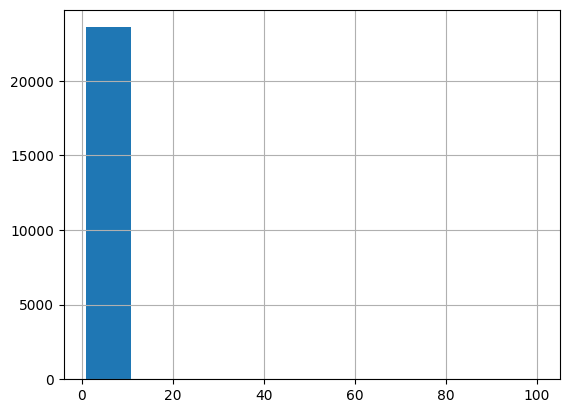

In [45]:
clean_data['ceiling_height'].hist()
plt.show()

выбросы имеют довольно высокие значения, но предположить, что надо поменять порядок, можно только для тех, которые превышают типично-минимальное значение (от 2.4м)

In [46]:
# посмотрим на данные с высотой потолков более 23 метров
clean_data[clean_data['ceiling_height'] >= 23].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


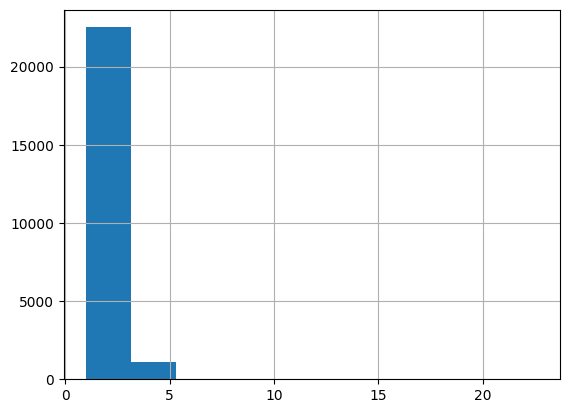

In [47]:
# уменьшим порядок для этих значений
clean_data['ceiling_height'] = (
    clean_data['ceiling_height']
    .where(clean_data['ceiling_height'] <= 23, clean_data['ceiling_height']/10)
)
clean_data['ceiling_height'].hist()
plt.show()

Значения между 5 и 23 пока непонятны (как и менее 2.3) - попробуем посмотреть на некоторые из них:

In [48]:
clean_data[clean_data['ceiling_height'] > 5].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,399.0,6,False,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,0.0,NaN,0.0,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Будем смотреть, как распределение по столбцу влияет на цену и количество дней размещения, чтобы понять, стоит ли избавляться от выбросов

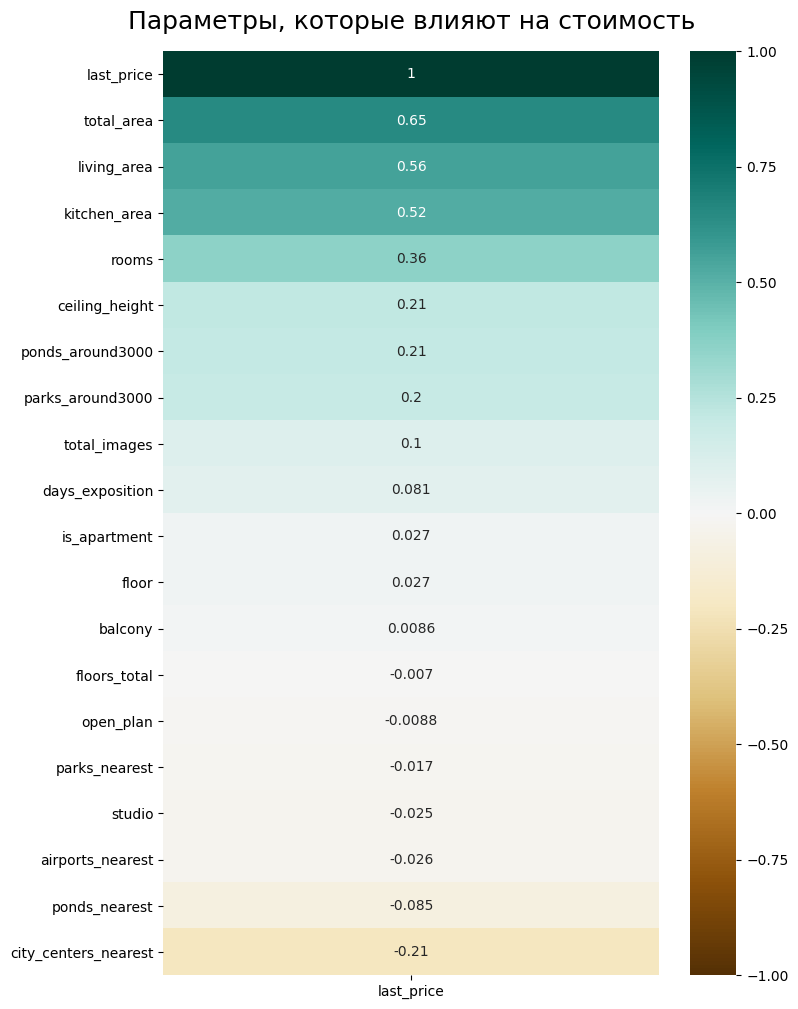

In [49]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

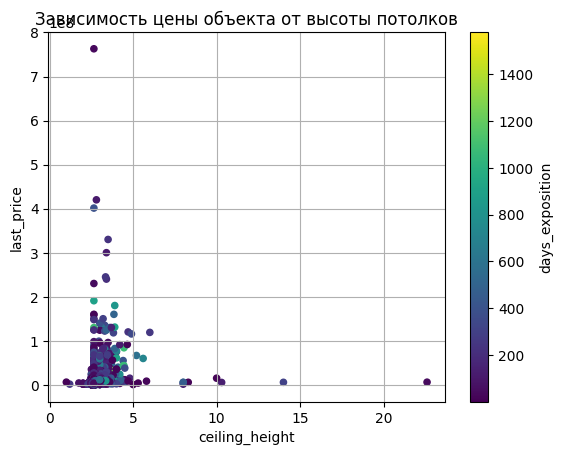

In [50]:
clean_data.plot(
    kind='scatter', 
    x='ceiling_height', 
    y='last_price', 
    c='days_exposition', 
    colormap='viridis', 
    grid=True,
    title='Зависимость цены объекта от высоты потолков')
plt.show()

Уберём значения > 5 и меньше 2х - они не повлияют на распределение

In [51]:
clean_data = clean_data[(clean_data['ceiling_height'] > 2) & (clean_data['ceiling_height'] < 5)]

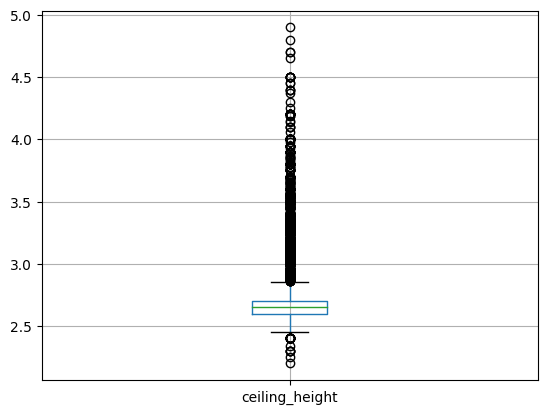

In [52]:
clean_data.boxplot(column='ceiling_height')
plt.show()

Значений, которые можно считать выбросами по-прежнему много, но мы их оставим

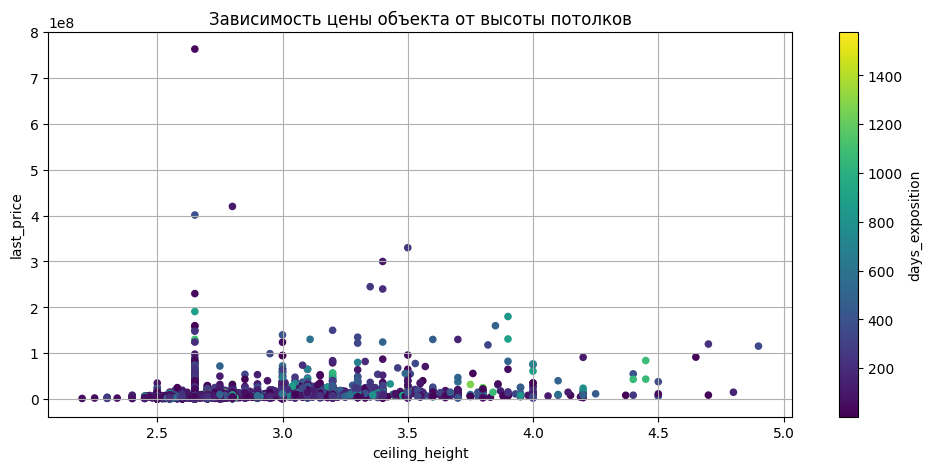

In [53]:
clean_data.plot(kind='scatter', 
                x='ceiling_height', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True, 
                title='Зависимость цены объекта от высоты потолков',
                figsize=(12,5))
plt.show()

In [54]:
# проверяем изменение корелляции после удаления выбросов
clean_data['ceiling_height'].corr(clean_data['last_price'])

0.2838292193592776

влияние увеличилось с 0.21 до 0.28 - считаем это приемлемым.

#### Количество фотографий

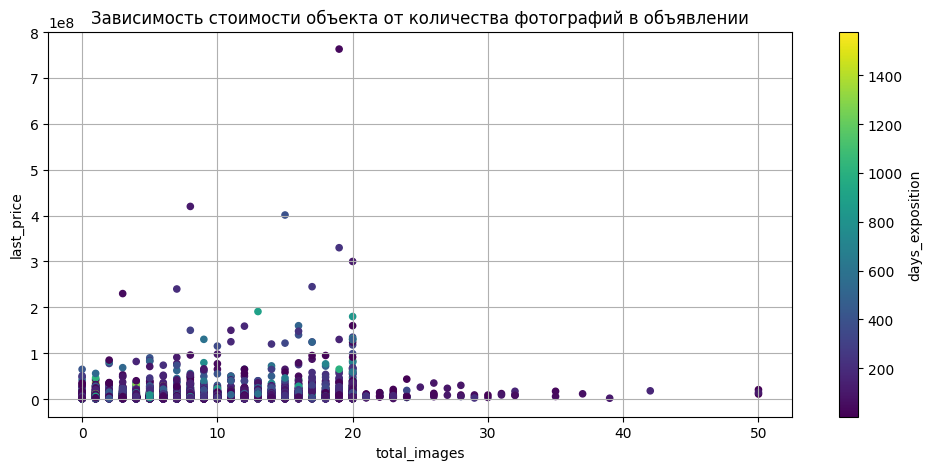

In [55]:
clean_data.plot(kind='scatter', 
                x='total_images', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True,
                figsize=(12,5),
                title='Зависимость стоимости объекта от количества фотографий в объявлении')
plt.show()

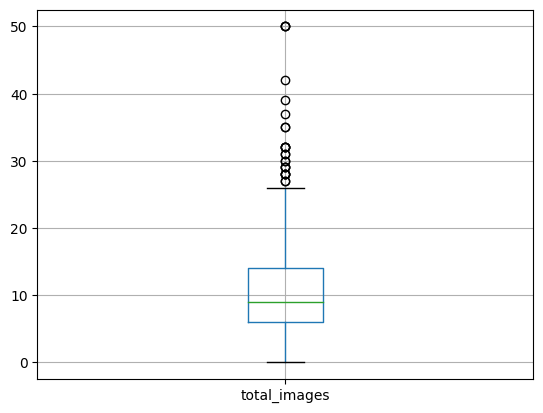

In [56]:
clean_data.boxplot(column='total_images')
plt.show()

От объявлений с количеством фотографий более 20 можно было бы избавиться, однако кажется, что они не будут использоваться в анализе - оставим как есть.

#### Общая площадь

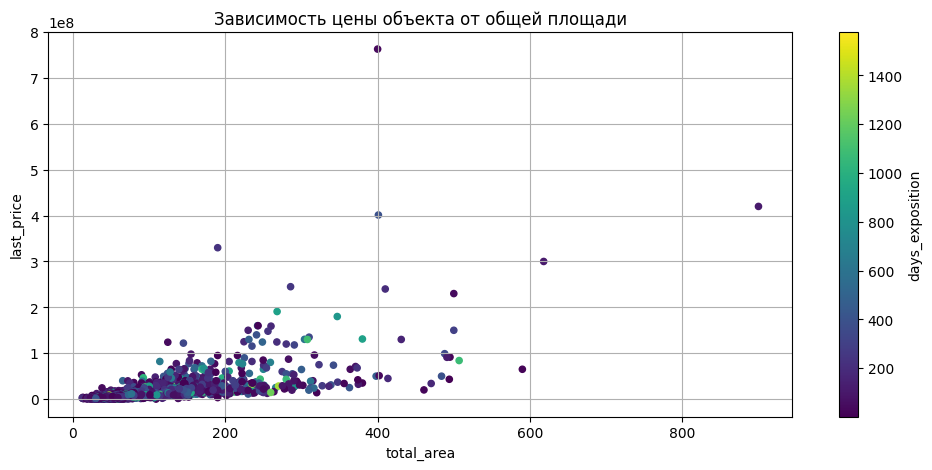

In [57]:
clean_data.plot(kind='scatter', 
                x='total_area', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True, 
                title='Зависимость цены объекта от общей площади',
                figsize=(12,5))
plt.show()

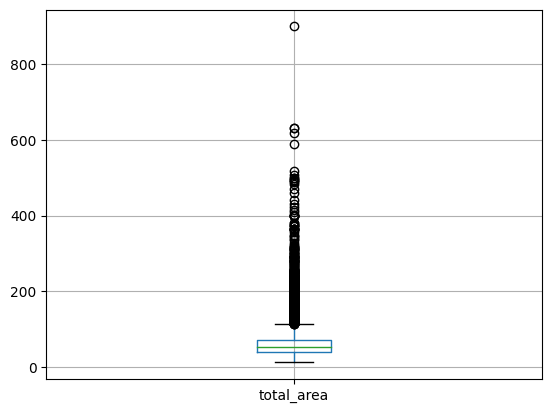

In [58]:
clean_data.boxplot(column='total_area')
plt.show()

По графикам видно, что в значениях `total_area` и `last_price` очень много выбросов. Возможно, где-то закрались лишние `0`.
Попробуем цены > 100000000 убрать как выбросы, а на значения площади > 400 посмотреть подробнее

In [59]:
clean_data = clean_data[clean_data['last_price'] < 100000000]
clean_data[clean_data['total_area'] > 400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.50,4,False,False,False,26.40,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3676,12,28789000.0,441.98,2019-01-23,4,2.65,6.0,441.98,6,False,False,False,35.05,0.0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000.0,517.00,2017-10-14,7,2.65,4.0,332.00,3,False,False,False,22.00,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.00,3,False,False,False,100.00,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
6221,8,34000000.0,470.30,2018-01-14,4,2.65,3.0,248.70,3,False,False,False,40.00,0.0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20.0,216.00,17,False,False,False,50.00,0.0,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7.0,301.50,7,True,False,False,45.50,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12.0,494.10,3,False,False,False,NaN,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7.0,347.50,7,False,False,False,25.00,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
14088,8,51000000.0,402.00,2017-02-07,6,3.15,8.0,300.00,6,False,False,False,56.00,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0


In [60]:
# уберём большие значения площади
clean_data = clean_data[clean_data['total_area'] < 400]


#### Количество комнат

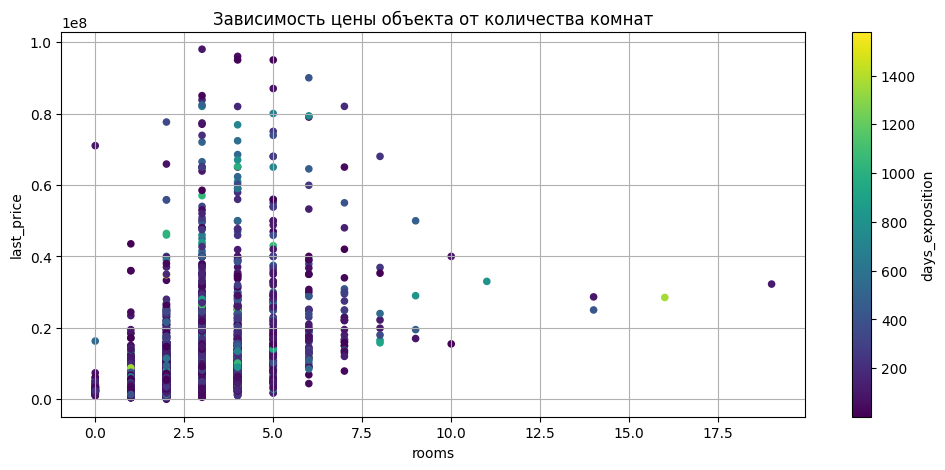

In [61]:
clean_data.plot(kind='scatter', 
                x='rooms', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True, 
                title='Зависимость цены объекта от количества комнат',
                figsize=(12,5))
plt.show()

Кажется, смело можно избавиться от строк с >= 10 комнат

In [62]:
clean_data[clean_data['rooms'] >= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,0.0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,27.6,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,False,False,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


In [63]:
clean_data = clean_data[clean_data['rooms'] < 10]

#### Общее количество этажей

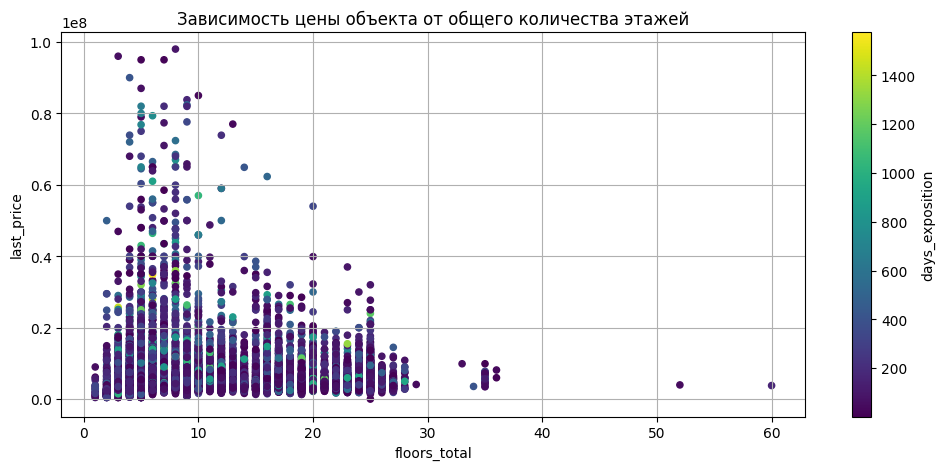

In [64]:
clean_data.plot(kind='scatter', 
                x='floors_total', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True,
                title='Зависимость цены объекта от общего количества этажей',
                figsize=(12,5))
plt.show()

In [65]:
clean_data[clean_data['floors_total'] > 30].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.65,36.0,21.4,28,False,False,False,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
871,14,7777777.0,75.0,2017-11-16,2,2.65,35.0,40.5,23,False,False,False,11.7,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,2.65,35.0,39.0,15,False,False,False,20.5,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34.0,18.0,23,False,False,False,NaN,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35.0,34.4,30,False,False,False,13.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


In [66]:
clean_data = clean_data[clean_data['floors_total'] < 30]

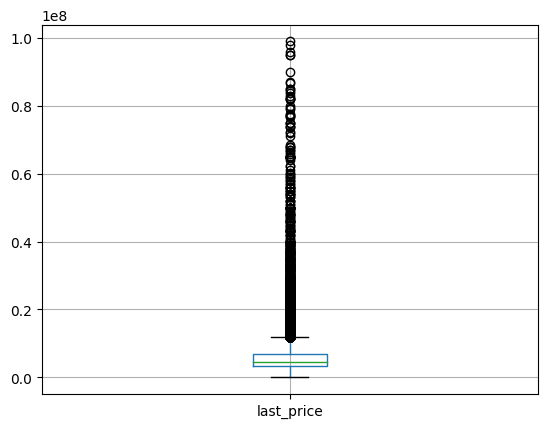

In [67]:
clean_data.boxplot(column='last_price')
plt.show()

После просмотра нескольких параметров сложилось впечатление, что выброс по ценам можно уменьшить ещё - до 50000000

In [68]:
clean_data = clean_data[clean_data['last_price'] < 50000000]


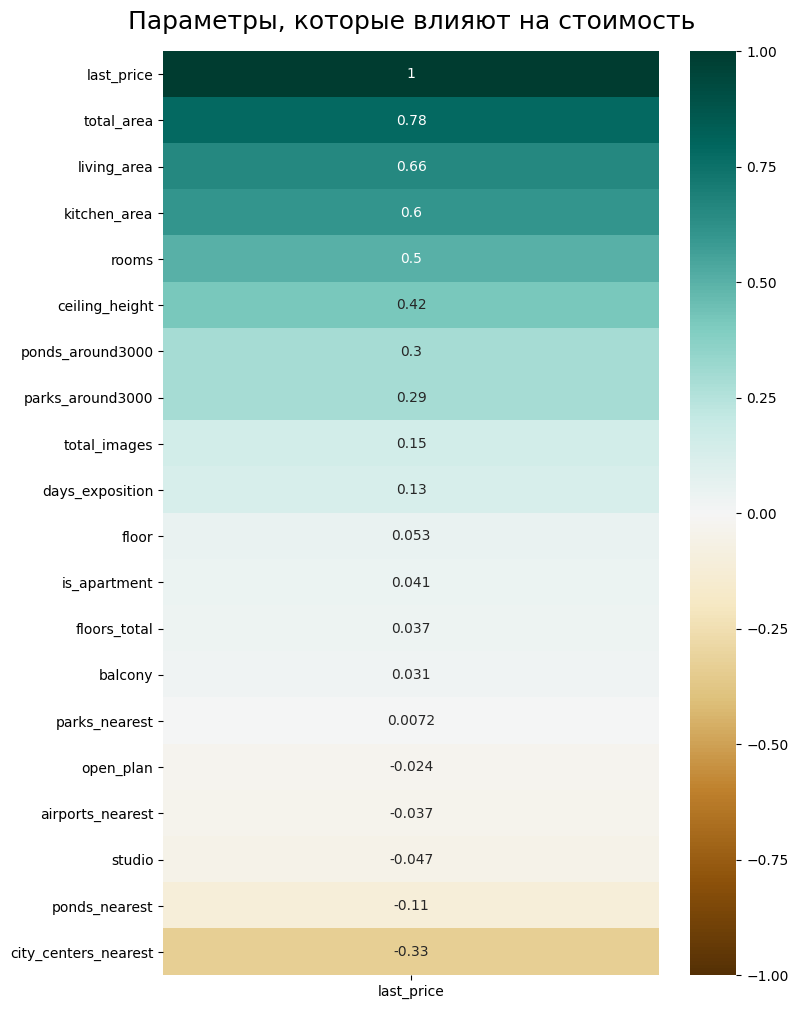

In [69]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

### Промежуточный вывод:

Мы обработали явные выбросы и аномалии в данных - редкие значения отбросили, а аномальные постарались привести к исходным или таким, которые не влияют на искажение исследования.
Влияние параметров на цену объекта изменилось численно, но порядок основных не поменялся - их можно продолжать исследовать

## Новые данные и категории

Добавим новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из *м* в *км* и округлите до целых значений).

In [70]:
# добавляем цену квадратного метра
clean_data['meter_price'] = clean_data['last_price']/clean_data['total_area']
# добавляем столбцы с данными о времени публикации объявления
clean_data['first_day_exposition_weekday'] = clean_data['first_day_exposition'].dt.weekday
clean_data['first_day_exposition_month'] = clean_data['first_day_exposition'].dt.month
clean_data['first_day_exposition_year'] = clean_data['first_day_exposition'].dt.year
# добавляем расстояние до центра города в километрах
clean_data['city_centers_nearest_km'] = round(clean_data['city_centers_nearest']/1000)

def floor_category(row):
    """
    Возвращает категорию по значению этажа floor, используя правила:
    - 'первый', если floor == 1;
    - 'последний', если floor равен общему количеству этажей floors_total;
    - 'другой', если floor не 1 и не равен общему количеству этажей floors_total
    """
    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] > row['floors_total']:
        return 'ошибка'
    return 'другой' 

clean_data['floor_category'] = clean_data.apply(floor_category, axis=1)

#проверим переименование
clean_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,city_centers_nearest_km,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,NaN,другой


In [71]:
clean_data['floor_category'].value_counts()

другой       17212
последний     3287
первый        2901
Name: floor_category, dtype: int64

## Исследовательский анализ данных

1. Изучим следующие параметры объектов:

    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.

### общая площадь

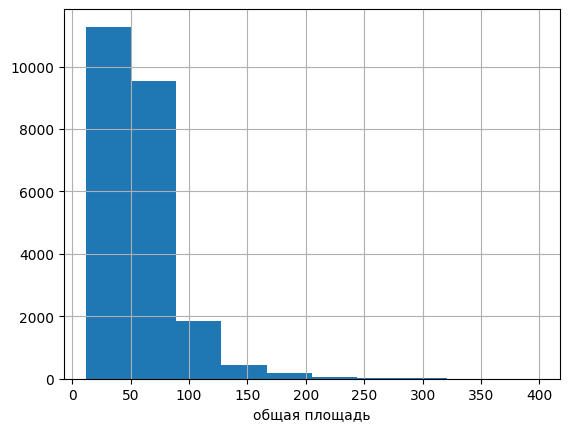

In [72]:
ax = clean_data['total_area'].hist()
ax.set_xlabel('общая площадь')
plt.show()

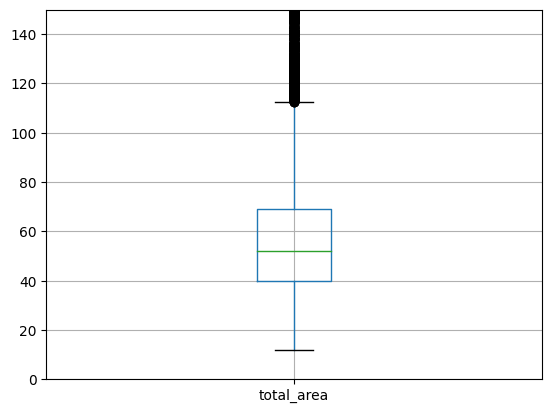

In [73]:
clean_data.boxplot(column='total_area')
plt.ylim(0,150)
plt.show()

In [74]:
clean_data['total_area'].describe()

count    23400.000000
mean        58.979332
std         29.754885
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        398.000000
Name: total_area, dtype: float64

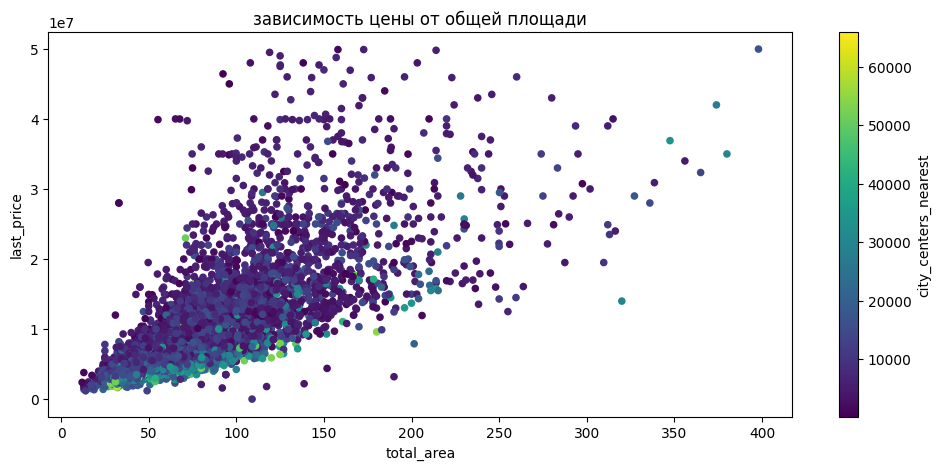

In [75]:
clean_data.plot(kind='scatter', 
                x='total_area', 
                y='last_price', 
                c='city_centers_nearest', 
                colormap='viridis',
                figsize=(12,5),
                title='зависимость цены от общей площади')
plt.show()

Большая часть объектов имеет площадь от 12 до 110 квадратных метров. Большие объекты статистически можно считать выбросами, однако такие объекты существуют и вполне поддаются описанию "чем больше, тем дороже"

### жилая площадь

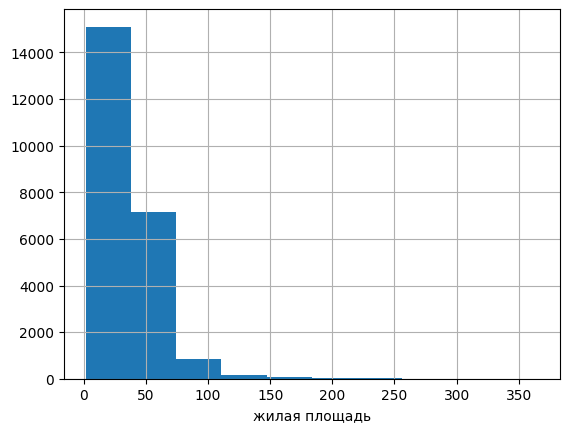

In [76]:
ax = clean_data['living_area'].hist()
ax.set_xlabel('жилая площадь')
plt.show()

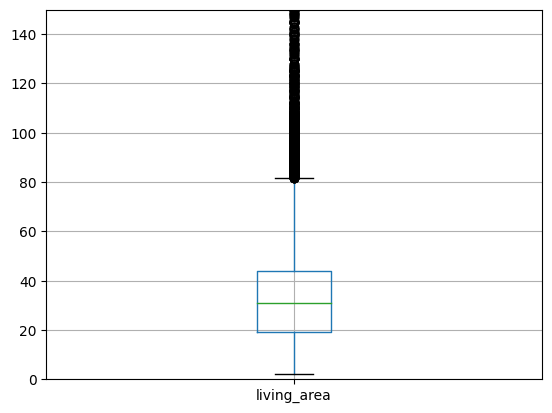

In [77]:
clean_data.boxplot(column='living_area')
plt.ylim(0,150)
plt.show()

In [78]:
clean_data['living_area'].corr(clean_data['total_area'])

0.8840266415043759

Жилая площадь ожидаемо кореллирует с общей площадью. Большая часть объектов имеет жилую площадь до 80 квадратных метров. 

### площадь кухни (были пропуски)

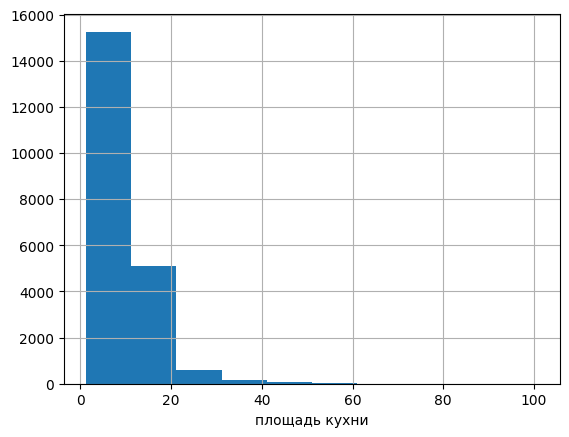

In [79]:
ax = clean_data['kitchen_area'].hist()
ax.set_xlabel('площадь кухни')
plt.show()

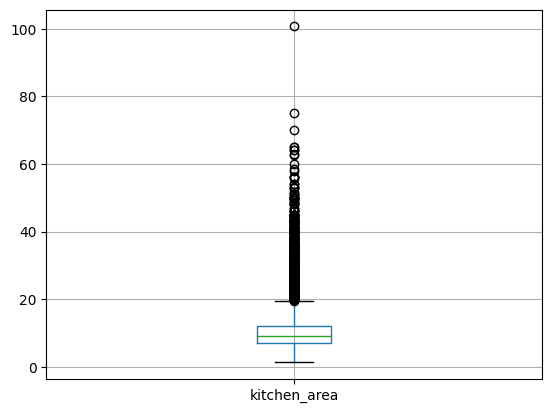

In [80]:
clean_data.boxplot(column='kitchen_area')
plt.show()

In [81]:
clean_data['kitchen_area'].corr(clean_data['living_area'])

0.37856366008477765

Площадь кухни слабо кореллирует с общей и жилой площадью. Однако, это может быть результатом большого количества пустых значений.

### цена объекта

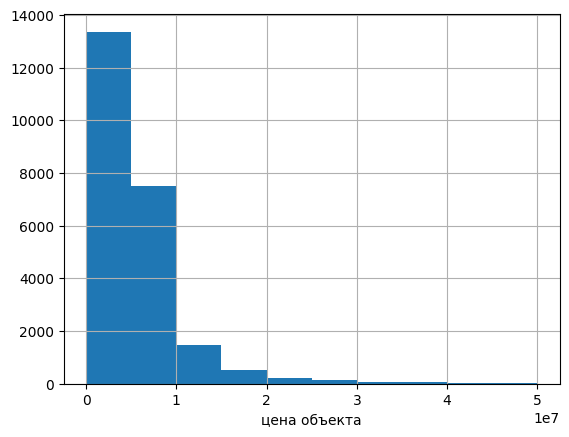

In [82]:
ax = clean_data['last_price'].hist()
ax.set_xlabel('цена объекта')
plt.show()

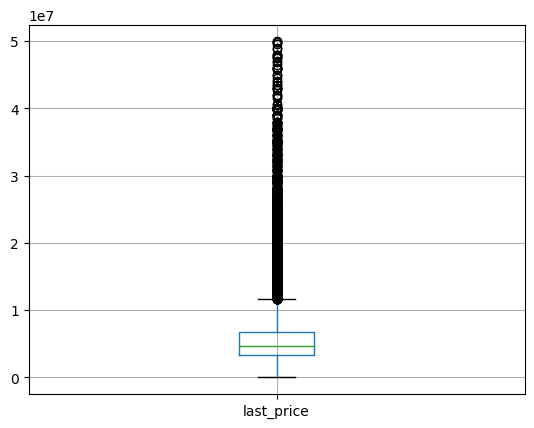

In [83]:
clean_data.boxplot(column='last_price')
plt.show()

Большая часть объектов торгуется в диапазоне до 10 000 000 

### количество комнат

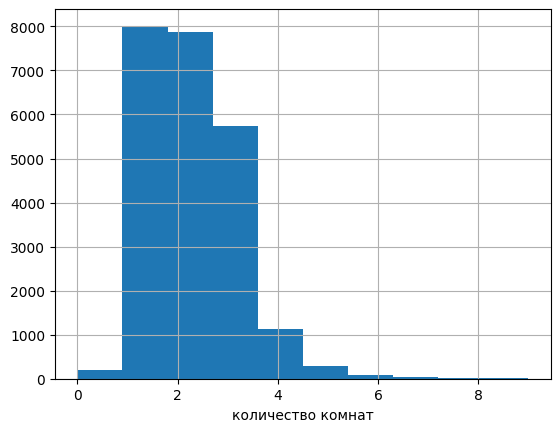

In [84]:
ax = clean_data['rooms'].hist()
ax.set_xlabel('количество комнат')
plt.show()

Ожидаемо, наиболее часто встречаются среди объявлений 1,2 и 3х комнатные квартиры

### высота потолков (добавлены медианные значения)

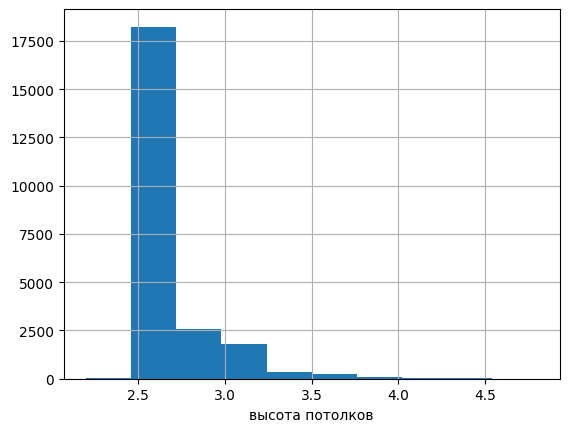

In [85]:
ax = clean_data['ceiling_height'].hist()
ax.set_xlabel('высота потолков')
plt.show()

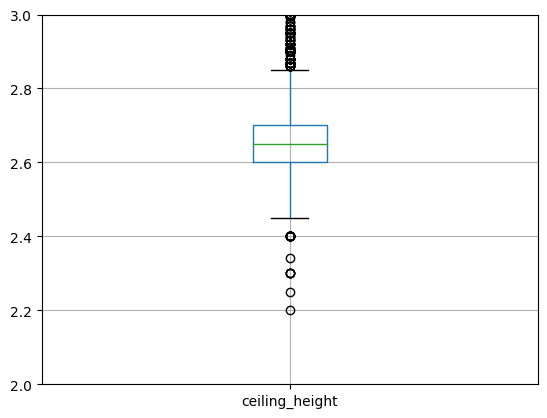

In [86]:
ax = clean_data.boxplot(column='ceiling_height')
ax.set_ylim(2,3)
plt.show()

### этаж квартиры
    

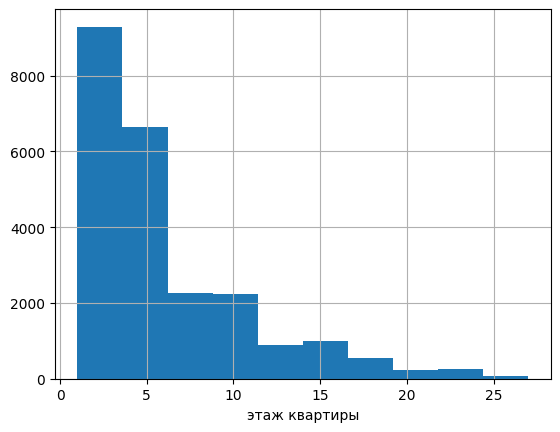

In [87]:
ax = clean_data['floor'].hist()
ax.set_xlabel('этаж квартиры')
plt.show()

### тип этажа квартиры («первый», «последний», «другой»)

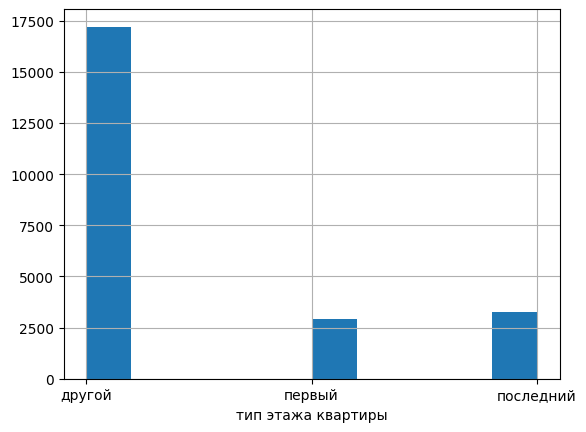

In [88]:
ax = clean_data['floor_category'].hist()
ax.set_xlabel('тип этажа квартиры')
plt.show()

### общее количество этажей в доме;


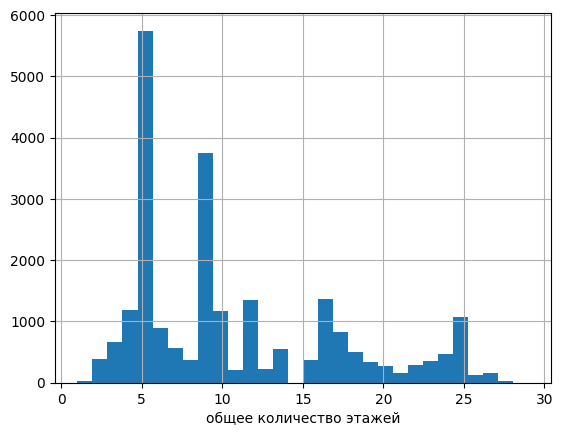

In [89]:
ax = clean_data['floors_total'].hist(bins=30)
ax.set_xlabel('общее количество этажей')
plt.show()

пики, возможно, связаны с типовыми домами (5, 9, 12, 16, 25)

### расстояние до центра города в метрах (есть пропуски)


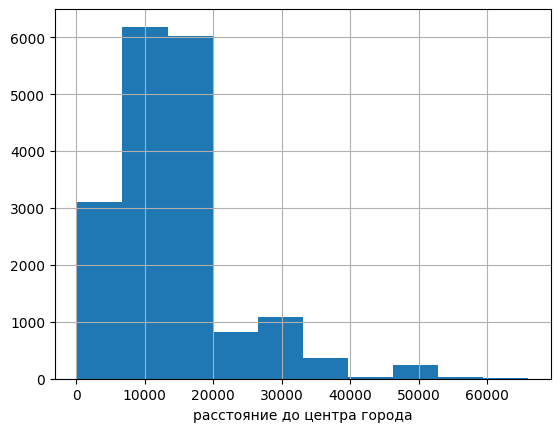

In [90]:
ax = clean_data['city_centers_nearest'].hist()
ax.set_xlabel('расстояние до центра города')
plt.show()

### расстояние до ближайшего аэропорта (есть пропуски)


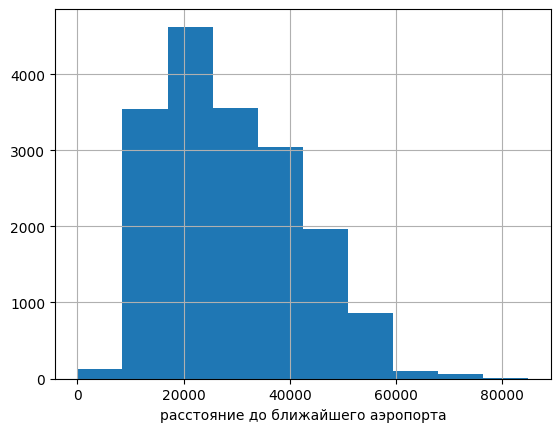

In [91]:
ax = clean_data['airports_nearest'].hist()
ax.set_xlabel('расстояние до ближайшего аэропорта')
plt.show()

### расстояние до ближайшего парка (есть пропуски)

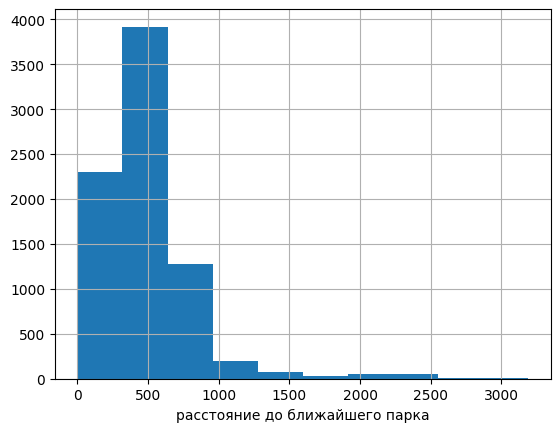

In [92]:
ax = clean_data['parks_nearest'].hist()
ax.set_xlabel('расстояние до ближайшего парка')
plt.show()

### день и месяц публикации объявления

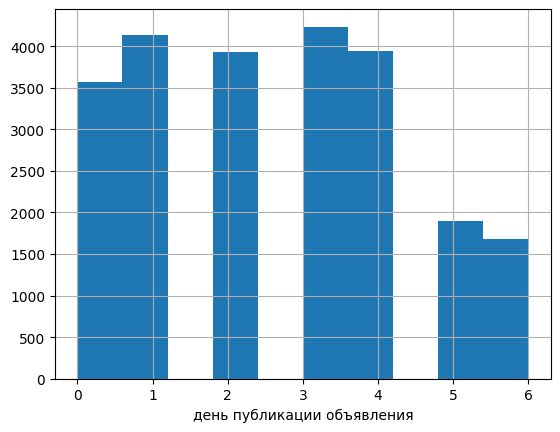

In [93]:
ax = clean_data['first_day_exposition_weekday'].hist()
ax.set_xlabel('день публикации объявления')
plt.show()

по выходным объявлений публикуется значительно меньше

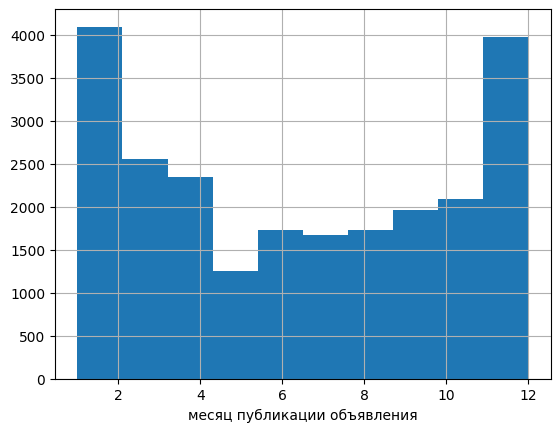

In [94]:
ax = clean_data['first_day_exposition_month'].hist()
ax.set_xlabel('месяц публикации объявления')
plt.show()

2. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.

- Пострим гистограмму.
- Посчитаем среднее и медиану.

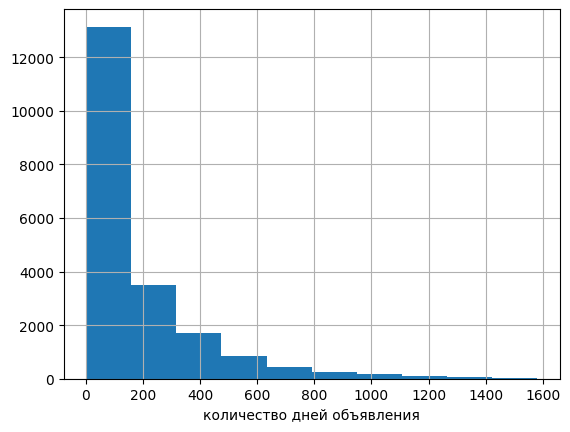

In [95]:
ax = clean_data['days_exposition'].hist()
ax.set_xlabel('количество дней объявления')
plt.show()

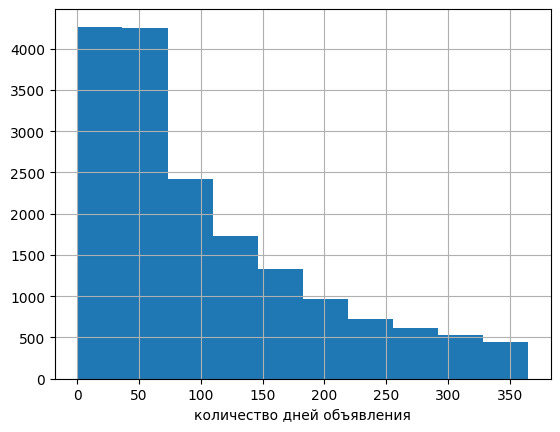

In [96]:
ax = clean_data['days_exposition'].hist(range=(0,365))
ax.set_xlabel('количество дней объявления')
plt.show()

Большая часть квартир продаётся за первые два месяца, затем график плавно спадает

In [97]:
clean_data['days_exposition'].describe()

count    20276.000000
mean       180.121079
std        219.074420
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Продажи в течение месяца можно считать быстрыми, а то, что не продаётся в течение года и более - необычайно долго.

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    
    Изучите, зависит ли цена от:
    
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
        
        Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

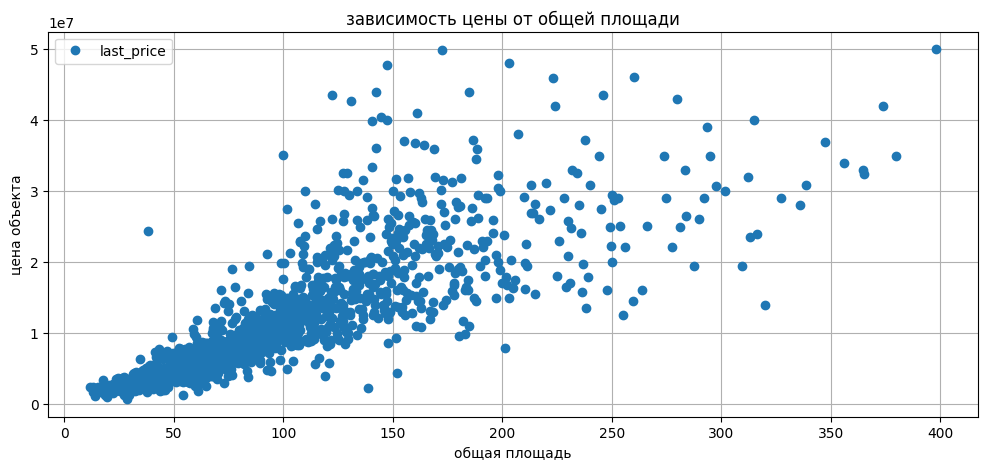

In [98]:
ax = clean_data.pivot_table(index='total_area', 
                       values='last_price', 
                       aggfunc='mean').plot(grid=True, figsize=(12, 5), title='зависимость цены от общей площади', style='o')
ax.set_xlabel('общая площадь')
ax.set_ylabel('цена объекта')
plt.show()

Цена зависит от общей площади объекта, тренд определённо в том, что больший по площади объект будет стоить дороже. Однако большие объекты схожие по площади могут очень сильно отличаться по цене. 

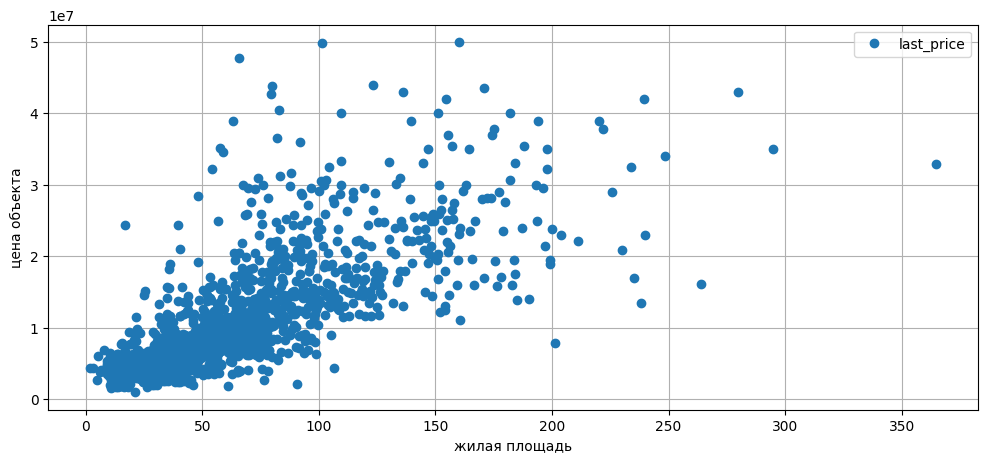

In [99]:
ax = clean_data.pivot_table(index='living_area', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o')
ax.set_xlabel('жилая площадь')
ax.set_ylabel('цена объекта')
plt.show()

тренд также виден, однако, разброс у близких значений очень высокий

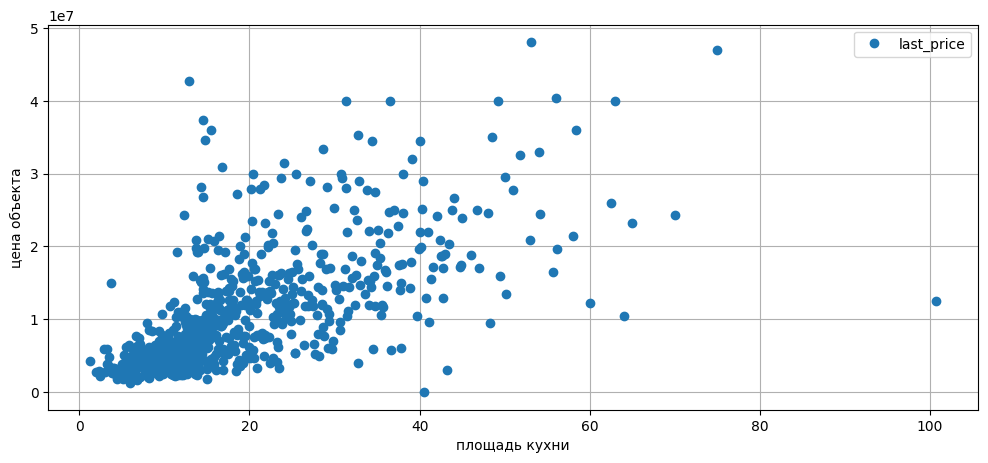

In [100]:
ax = clean_data.pivot_table(index='kitchen_area', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o')
ax.set_xlabel('площадь кухни')
ax.set_ylabel('цена объекта')
plt.show()

Из трёх видов площадей с ценой лучше всего кореллирует общая площадь

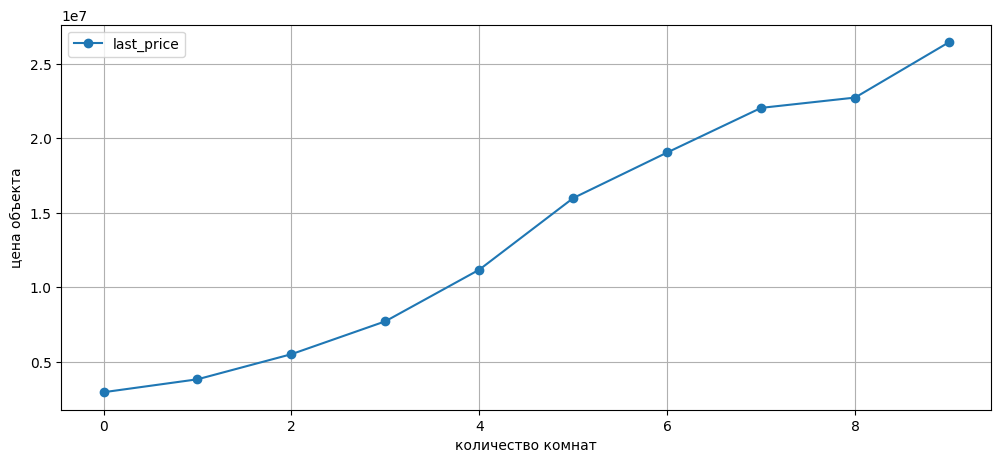

In [101]:
ax = clean_data.pivot_table(index='rooms', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o-')
ax.set_xlabel('количество комнат')
ax.set_ylabel('цена объекта')
plt.show()

Количество комнат может являться параметром ценообразования - чем больше комнат, тем выше средняя цена объекта

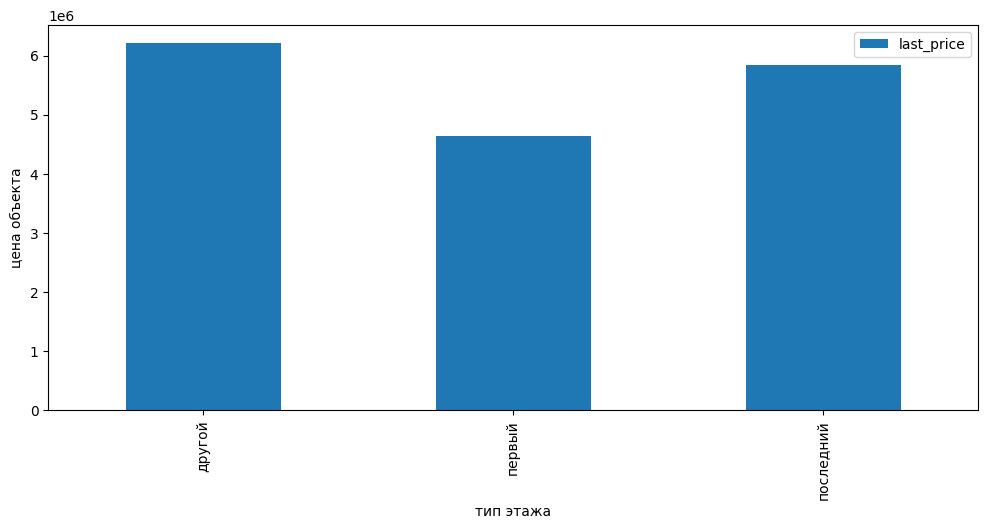

In [102]:
ax = clean_data.pivot_table(index='floor_category', 
                            values='last_price', 
                            aggfunc='mean').plot(figsize=(12, 5), kind='bar')
ax.set_xlabel('тип этажа')
ax.set_ylabel('цена объекта')
plt.show()

Первый и последний этажи - не в фаворе. Они уменьшают среднюю стоимость объекта.

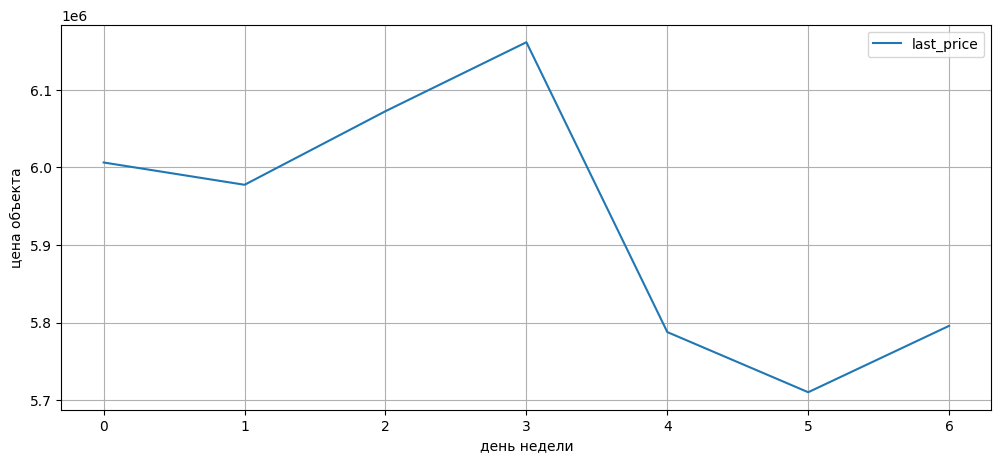

In [103]:
ax = clean_data.pivot_table(index='first_day_exposition_weekday', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('день недели')
ax.set_ylabel('цена объекта')
plt.show()

Ближе к концу недели выкладываются более дешёвые предложения

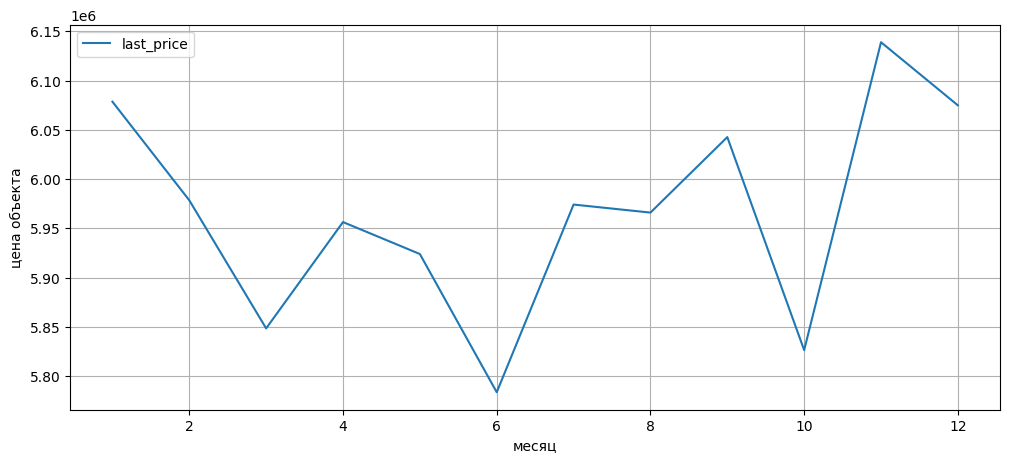

In [104]:
ax = clean_data.pivot_table(index='first_day_exposition_month', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('месяц')
ax.set_ylabel('цена объекта')
plt.show()

в начале и конце года цены самые высокие, также летом есть подъём

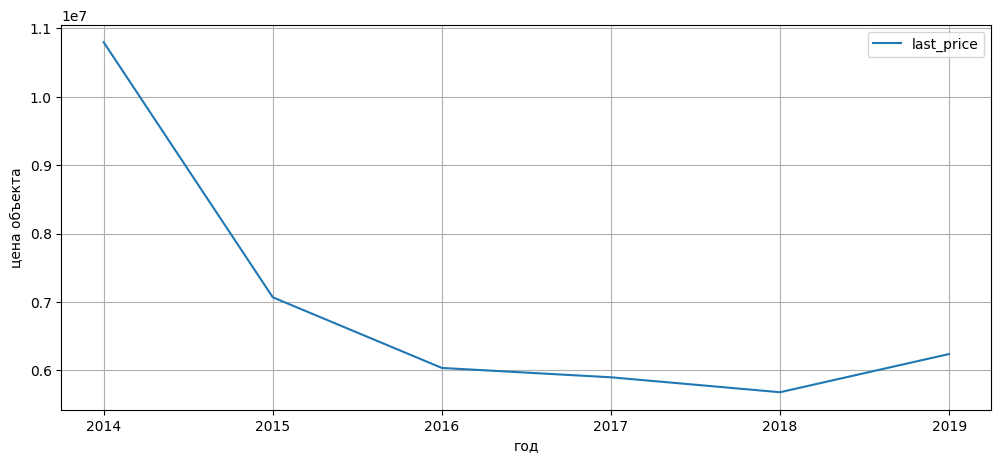

In [105]:
ax = clean_data.pivot_table(index='first_day_exposition_year', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('год')
ax.set_ylabel('цена объекта')
plt.show()

цены снижались с течением лет, но в 2019м наметился тренд на повышение

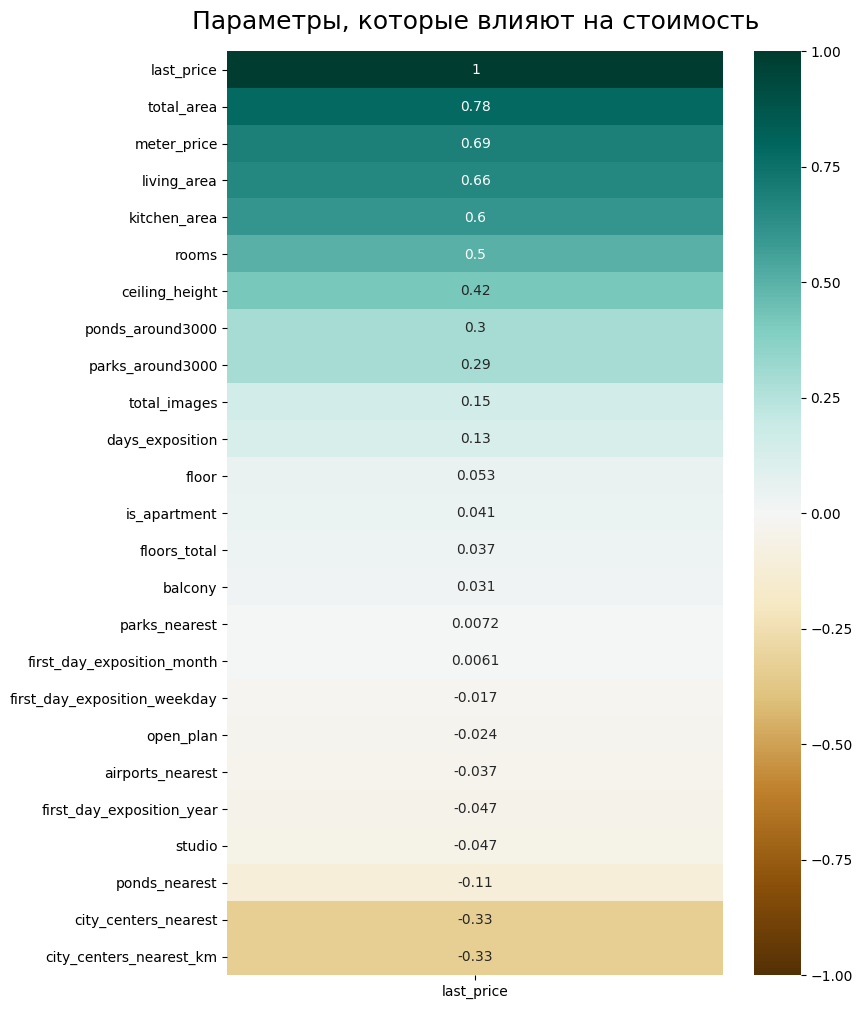

In [106]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [107]:
big_places = clean_data.groupby('locality_name').count().sort_values(by='meter_price', ascending=False)
big_places = big_places[:10]

clean_data[clean_data['locality_name'].isin(big_places.index)].pivot_table(index='locality_name', values='meter_price', aggfunc='mean').sort_values(by='meter_price')

,meter_price
locality_name,
Выборг,58238.143141
Всеволожск,68719.320400
Гатчина,68746.146763
Колпино,75424.579098
посёлок Шушары,78551.344545
посёлок Мурино,85629.568678
посёлок Парголово,90175.913458
деревня Кудрово,92473.547576
Пушкин,103125.819291


Наиболее дорогой квадратный метр - ожидаемо в Санкт-Петербурге. Наиболее дешёвый - в Выборге.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделм квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

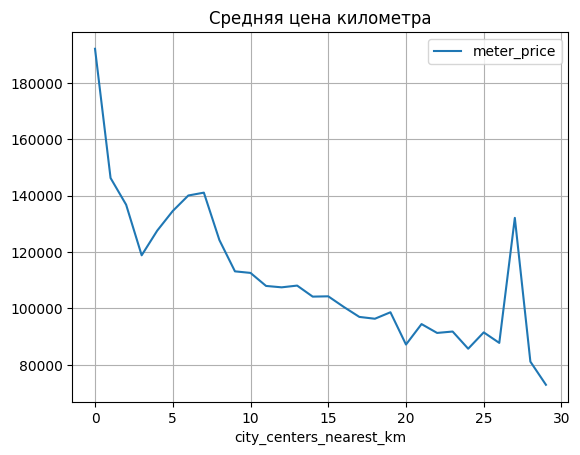

In [108]:
ax = (
        clean_data[clean_data['locality_name'] == 'Санкт-Петербург']
        .pivot_table(index='city_centers_nearest_km', values='meter_price', aggfunc='mean')
        .plot(grid=True, title='Средняя цена километра')
    )
plt.show()

Чем дальше от центра, тем ниже средняя цена за метр кадратный. График резко идёт вверх при приближении к центру от 4х километров. Есть аномальный выброс на 26 км от центра.

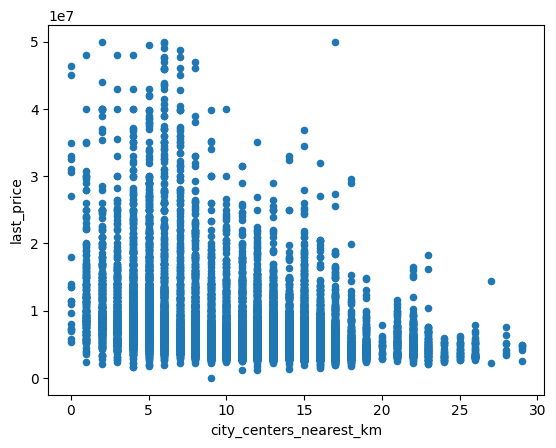

In [109]:
ax = (
    clean_data[clean_data['locality_name'] == 'Санкт-Петербург']
    .plot(kind='scatter', x='city_centers_nearest_km', y='last_price')
)
plt.show()

## Общий вывод

#### Краткий обзор проведённой работы. 
В приведённом исследовании стояла задача изучить данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет и установить параметры, помогающие определить рыночную стоимость квартир.

В первой части мы готовили данные для исследования:
- Мы обнаружили достаточно большое количество пропусков в некоторых параметрах.
что сделали:
  - приняли высоту потолков за среднюю там, где они не были указаны
  - удалили строки, в которых не указана высота дома (всего этажей), так как их было очень мало
  - если не указано количество балконов - приняли за 0
  - если не указано название населённого пункта - указали `'unknown'`
  - приняли жилую площадь равной общей площади там, где значения не были указаны
  - приняли 0 парков и прудов рядом, если они не указаны
  - признак апартаментов приняли False, если ничего не указано

- В данных наблюдаются редкие значения, которые смещают выборки и могут быть ошибочными, так как выходят за рамки ожидаемых распределений. 
Мы обработали явные выбросы и аномалии в данных - редкие значения отбросили, а аномальные постарались привести к исходным или таким, которые не влияют на искажение исследования.
Влияние параметров на цену объекта изменилось численно, но порядок основных не поменялся.

Также для целей исследования добавили некоторые категории и параметры.

#### Главные выводы. 
Параметры, помогающие определить рыночную стоимость квартир, можно разделить на три категории:
1. Параметры объекта
    - общая площадь - наиболее важный показатель
    - жилая площадь
    - площадь кухни
    - количество комнат
2. Расположение
  - близость парков и прудов
  - близость к центру города
  - населённый пункт
3. Время публикации
  - ближе к концу недели выкладываются более дешёвые предложения (пт, сб и вс)
  - в начале и конце года цены самые высокие (с ноября по февраль), также летом есть подъём (июль-сентябрь)

  
Продажи в течение месяца можно считать быстрыми, а то, что не продаётся в течение года и более - необычайно долго.

#### Рекомендации.
В данных достаточно много пропусков, значения для которых должны были быть получены автоматически на основе картографических данных, или вычислены на основе разницы дат.
- airports_nearest         5532
- city_centers_nearest     5509
- parks_nearest           15568
- ponds_nearest           14552
- days_exposition          3172

Эти пропуски достаточно сложно обработать, также они могут означать как то, что рядом этих объектов нет, так и то, что объекты очень близко. Заменять их на 0 значит определить их в категорию "очень близко". Рекомендуем проверить формирование этих данных и какие-то значения, помогающие определить, что этот параметр нужно игнорировать (слишком далеко/близко)

Некоторые параметры, вроде количества балконов, могут иметь значения по-умолчанию, чтобы, например, если не указано количество балконов - вариант был по-умолчанию 0, или 0 парков и прудов рядом, если они не указаны.

Есть некоторые ошибки в типах данных, которые стоило бы исправить при формировании выгрузки. Для целей исследования мы их заменили:
- `balcony` — стоит поменять тип данных на `int`
- `days_exposition` — стоит поменять тип данных на `int`
- `first_day_exposition` — дата публикации имеет строковый формат - надо поменять на `datetime`
- `floors_total` — можно поменять тип данных на `int`
- `is_apartment` — в описании указано, что это `bool`, но тут это строка
- `parks_around3000` — стоит поменять тип данных на `int`
- `ponds_around3000` — стоит поменять тип данных на `int`

Названия населённых пунктов рекомендуется делать выбором из списка, а не ручным вводом - в данных были встречены неявные дубликаты



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод